In [246]:
%matplotlib inline
from matplotlib import pyplot as plt, rcParams, animation, rc
# Set plot size
rcParams['figure.figsize'] = 3, 3

import numpy as np

# Set precision for printed outputs
np.set_printoptions(precision=4, linewidth=100)

In [14]:
def f_lin(x, a, b): return a*x + b

a = 2.
b = 5.

(30,) [ 0.1361  0.9089  0.3545  0.9918  0.1983  0.4982  0.3884  0.1565  0.9268  0.0136  0.4209  0.0805
  0.2927  0.2931  0.8479  0.0865  0.6751  0.6966  0.0692  0.3044  0.1141  0.702   0.9491  0.5915
  0.0555  0.2826  0.6161  0.3107  0.678   0.845 ]
(30,) [ 5.2721  6.8178  5.7091  6.9837  5.3967  5.9965  5.7768  5.313   6.8535  5.0273  5.8419  5.161
  5.5854  5.5863  6.6958  5.173   6.3502  6.3933  5.1384  5.6088  5.2282  6.4041  6.8981  6.183
  5.1111  5.5653  6.2323  5.6215  6.3559  6.69  ]


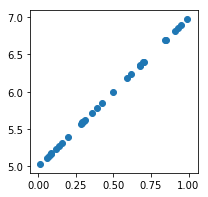

In [232]:
# Generate 10 randoms "x"
n = 30
x = np.random.random(n)
y = f_lin(x, a, b)

print (x.shape, x)
print (y.shape, y)

plt.scatter(x, y)

In [37]:
# Define our loss function. We'll use sum of squared errors (SSE)
def sse(val, val_pred): return np.power(val - val_pred, 2).sum() # or ((val - val_pred)**2).sum()

# Define how to calculate loss for our example
def loss(val, x, a, b): return sse(val, f_lin(x, a, b))

# Define the average loss for all the data (n)
def avg_loss(y, x, a, b): return np.sqrt(loss(y, x, a, b)/n)

Start with wild guess (*a_guess* and *b_guess*) for *a* and *b*. Our goal will be to update *a_guess* and *b_guess* in order to minimze our loss.

After "enough" updates, *a_guess* and *b_guess* should be close to the original *a* and *b*.

In [255]:
# Arbitrary guess
a_guess = 1.
b_guess = -1.

# Test our a_guess and b_guess
avg_loss(y, x, a_guess, b_guess)

6.4568

Because our guesses were totally random, we get a huge loss. We now need to update those guesses in the way it will decrease our loss. 

In [257]:
# Define the learning rate.
lr = 0.1

def update(loop=500):
    # Make a_guess and b_guess global
    global a_guess, b_guess
    
    for i in range(loop):
    
        # Calculate a prediction
        val_pred = f_lin(x, a_guess, b_guess)

        # Calculate the error, i.e, how far it is from the real values
        loss = avg_loss(val_pred, x, a, b)
        #print loss

        # In order to update our guesses, we need to compute the derivatives of our loss function
        # It will tell us which way we need to update them (increase or decrease) and by which amount
        # d[(y - (a*x + b))**2, b] = 2 (b + a x - y) = 2 (y_pred - y) = dloss_db
        # d[(y - (a*x + b))**2, a] = 2 x (b + a x - y) = 2 x (y_pred - y) = x * dloss_db = dloss_da

        dloss_db = 2*(val_pred - y)
        dloss_da = x*dloss_db

        a_guess -= lr*dloss_da.mean()
        b_guess -= lr*dloss_db.mean()
        
    print("Parameters -> a_guess = {}, b_guess = {} after {} runs".format(a_guess, b_guess, loop))

In [266]:
update(500)

Parameters -> a_guess = 2.0, b_guess = 5.0 after 500 runs
